<a href="https://colab.research.google.com/github/Angelpperez/Taca_2/blob/main/TACA2FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis Bibliométrico, Estado del Arte
##Autor: Angel Pérez

- Ecución de Búsqueda WoS(Web of Science):


In [ ]:
!pip install wos

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 kB 16.3 MB/s eta 0:00:00
  Created wheel for wos: filename=wos-0.2.7-py3-none-any.whl size=9902 sha256=19d725c663adf01e863c8831611645ef534c3d39e69f56b98949188d5fd66e2c
  Stored in directory: /root/.cache/pip/wheels/fc/69/b7/fac562d3911d4578e6c72d8cf3384a66bb6917176276ebfc56
  Created wheel for limit: filename=limit-0.2.3-py3-none-any.whl size=2325 sha256=f29c94f79b30df6285d1d19ec1cb2765d62dc6f9cd10fa286d3c5071e5cd48d3
  Stored in directory: /root/.cache/pip/wheels/c1/7e/41/2060f75262656211fc713cded5d55ccb2a949e6fac70c6934d
Successfully built wos limit


In [ ]:
%cd /content/

/content


In [ ]:
!git clone https://github.com/Angelpperez/EmotionalAI.git
%cd /content/EmotionalAI

fatal: destination path 'EmotionalAI' already exists and is not an empty directory.
/content/EmotionalAI


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('savedrecs.xls', engine='xlrd')

In [ ]:
# Guarda el archivo en formato .csv
df.to_csv('data.csv', index=False)
data = pd.read_csv('data.csv')
#print(data.head())

In [ ]:
# Limpieza de datos
data.drop_duplicates(inplace=True)

Text(0.5, 1.0, 'Frecuencia de Publicaciones por Año')

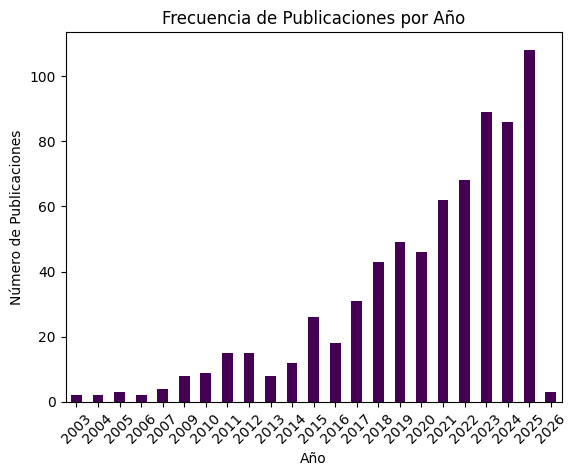

In [ ]:
# Análisis de frecuencia de publicaciones por año
publicaciones_por_anio = data.groupby('Publication Year').size()

publicaciones_por_anio.plot(kind='bar', colormap='viridis')
plt.xticks(rotation=45)
plt.xlabel('Año')
plt.ylabel('Número de Publicaciones')
plt.title('Frecuencia de Publicaciones por Año')

/tmp/ipython-input-1249186718.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=autores_mas_citados.values, y=autores_mas_citados.index, palette='viridis')


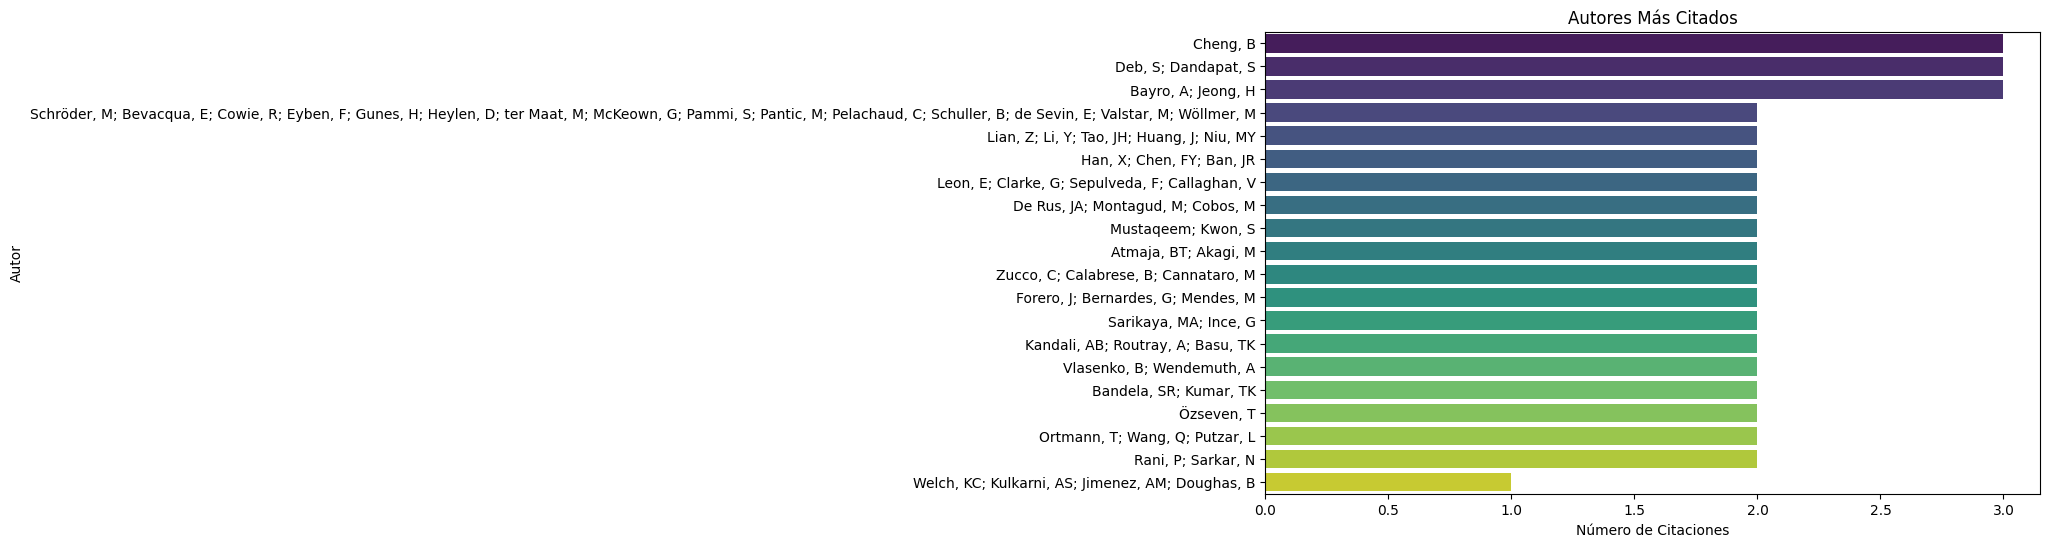

In [ ]:
# Análisis de los autores más citados
autores_mas_citados = df['Authors'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=autores_mas_citados.values, y=autores_mas_citados.index, palette='viridis')
plt.title('Autores Más Citados')
plt.xlabel('Número de Citaciones')
plt.ylabel('Autor')
plt.show()

Author
Li, Y          11
Sarkar, N       9
Schuller, B     8
Li, J           7
Zhang, L        6
Wang, J         6
Tao, JH         6
Yin, Z          5
Wang, C         5
Seiss, E        5
Zhang, Y        5
Mavridou, I     5
Cambria, E      5
Li, X           5
Cao, DP         5
Guo, G          5
Pantic, M       5
Dang, JW        5
Liu, L          5
Li, WB          5
Name: count, dtype: int64


/tmp/ipython-input-3670812711.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=authors_counts.values, y=authors_counts.index, palette='viridis')


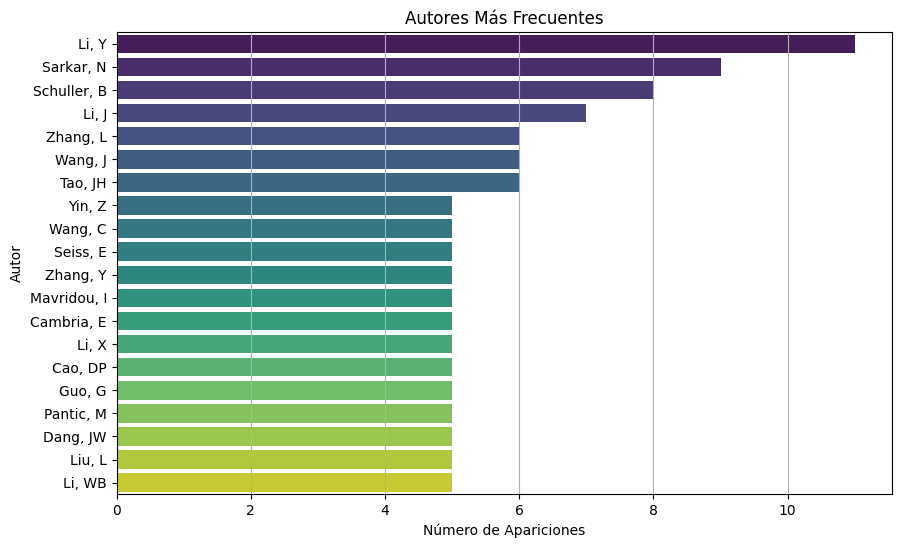

In [ ]:
# Separar los nombres de autores en una lista si están en un solo campo
df['Authors'] = df['Authors'].str.split('; ')

# Crear un DataFrame a partir de la lista de autores
authors_df = pd.DataFrame(df['Authors'].tolist()).stack().reset_index(level=1, drop=True).to_frame('Author')

# Calcular los autores más frecuentes
authors_counts = authors_df['Author'].value_counts().head(20)

# Mostrar los autores más frecuentes
print(authors_counts)

# Visualización de los autores más citados
plt.figure(figsize=(10, 6))
sns.barplot(x=authors_counts.values, y=authors_counts.index, palette='viridis')
plt.title('Autores Más Frecuentes')
plt.xlabel('Número de Apariciones')
plt.ylabel('Autor')
plt.grid(axis='x')
plt.show()

                                         Article Title  Cited Reference Count
600  Bridging the gap between emotion and joint action                    425
672  A Survey of Cutting-edge Multimodal Sentiment ...                    368
545  Review and Perspectives on Driver Digital Twin...                    320
648  Extraction and Utilization of Excitation Infor...                    298
678  Navigating challenges/opportunities in develop...                    296
0    A review and critical analysis of multimodal d...                    277
578  Progress in Brain Computer Interface: Challeng...                    269
340  Speech emotion recognition approaches: A syste...                    258
482  Deep learning approaches for speech emotion re...                    226
25   Speech Databases, Speech Features, and Classif...                    221
464  A Human-Centric Metaverse Enabled by Brain-Com...                    219
693  Sentiment analysis using fuzzy logic: A compre...          

/tmp/ipython-input-2569378012.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publicaciones_mas_citadas['Cited Reference Count'], y=publicaciones_mas_citadas['Article Title'], palette='viridis')


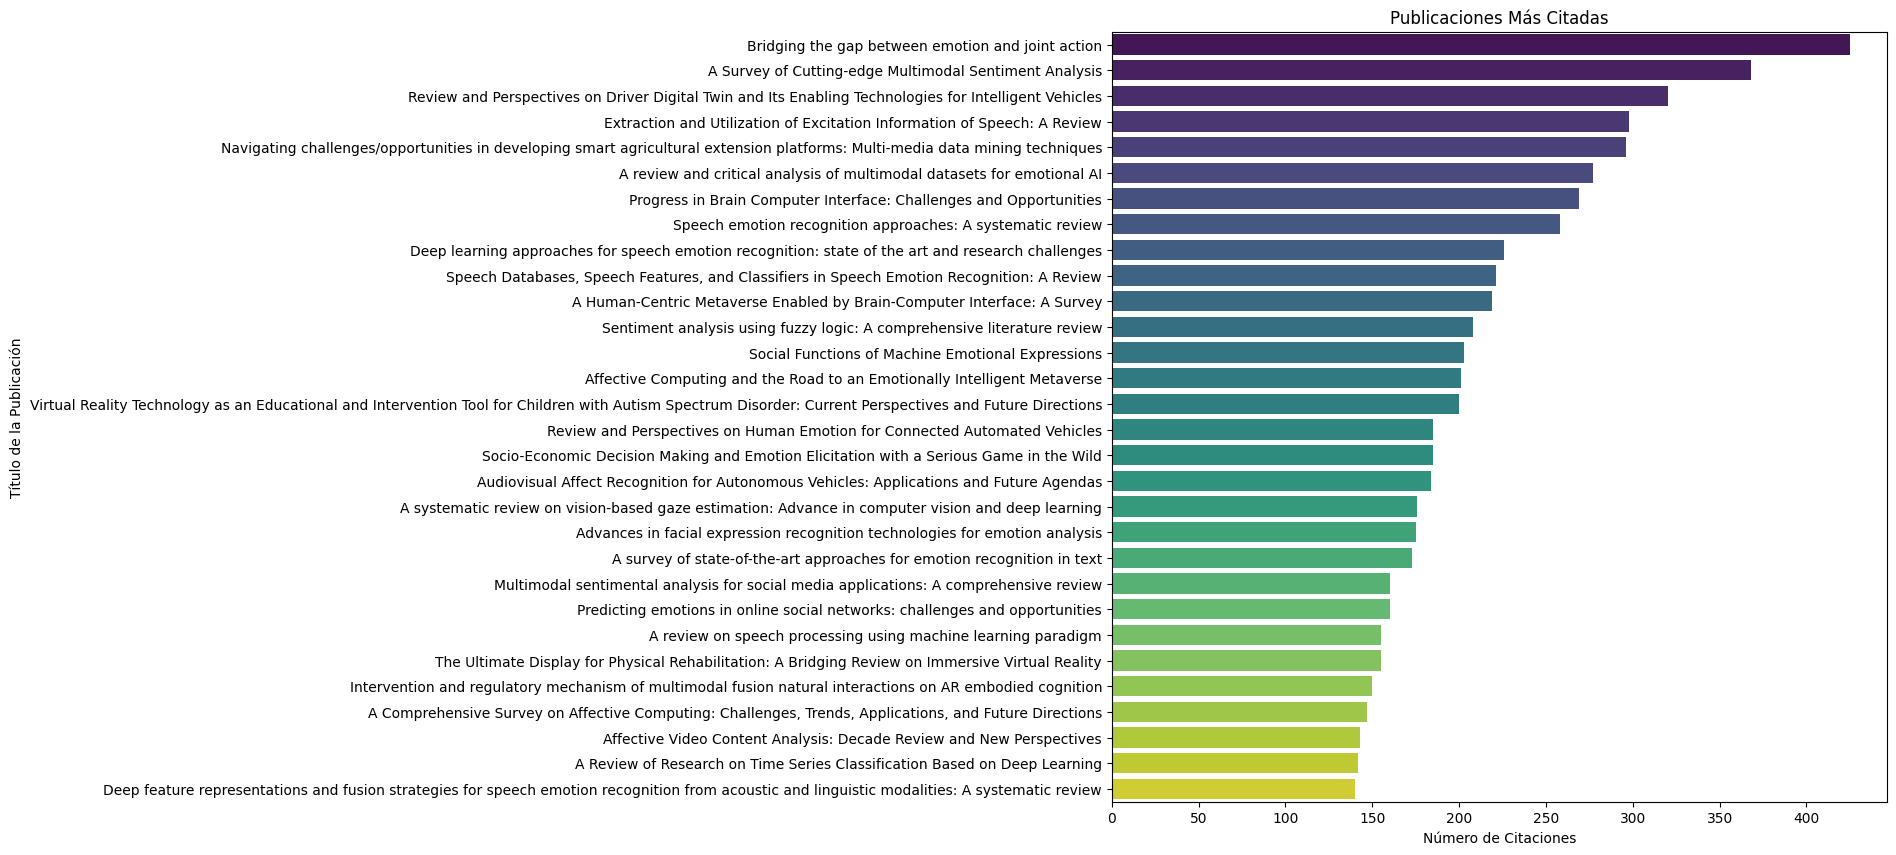

In [ ]:
#Obtener publicaciones más citadas de los últimos 5 años
from datetime import datetime
# citas sea de tipo numérico
df['Cited Reference Count'] = pd.to_numeric(df['Cited Reference Count'], errors='coerce')

publicaciones_recientes = df[df['Publication Year'] >= datetime.now().year - 5]

# Obtener las publicaciones más citadas
publicaciones_mas_citadas = publicaciones_recientes.sort_values(by='Cited Reference Count', ascending=False).head(30)

# Mostrar las publicaciones más citadas
print(publicaciones_mas_citadas[['Article Title', 'Cited Reference Count']])

# Visualización de las publicaciones más citadas
plt.figure(figsize=(10, 10))
sns.barplot(x=publicaciones_mas_citadas['Cited Reference Count'], y=publicaciones_mas_citadas['Article Title'], palette='viridis')
plt.title('Publicaciones Más Citadas')
plt.xlabel('Número de Citaciones')
plt.ylabel('Título de la Publicación')
plt.show()

In [ ]:
!pip install wordcloud networkx matplotlib

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

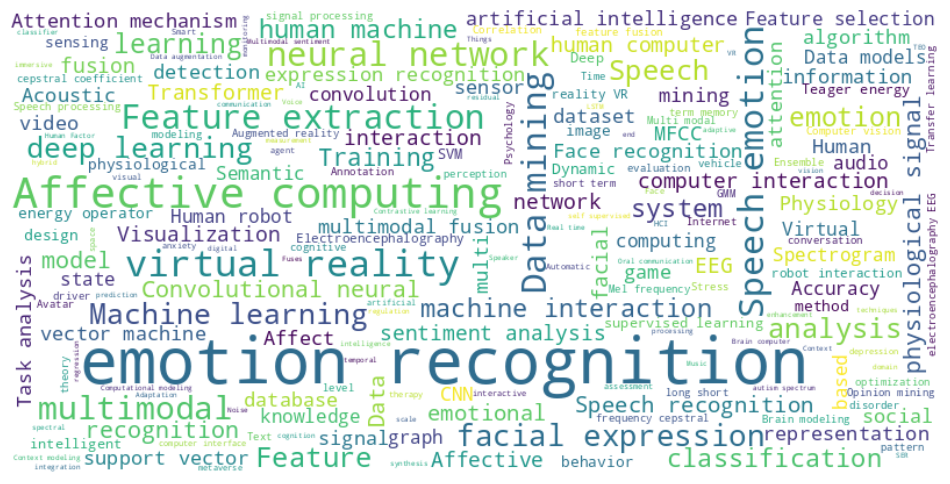

In [ ]:
from wordcloud import WordCloud

# Unir todas las palabras clave en un solo string
text = ' '.join(df['Author Keywords'].dropna())

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

Text(0.5, 1.0, 'Relaciones entre Palabras Clave')

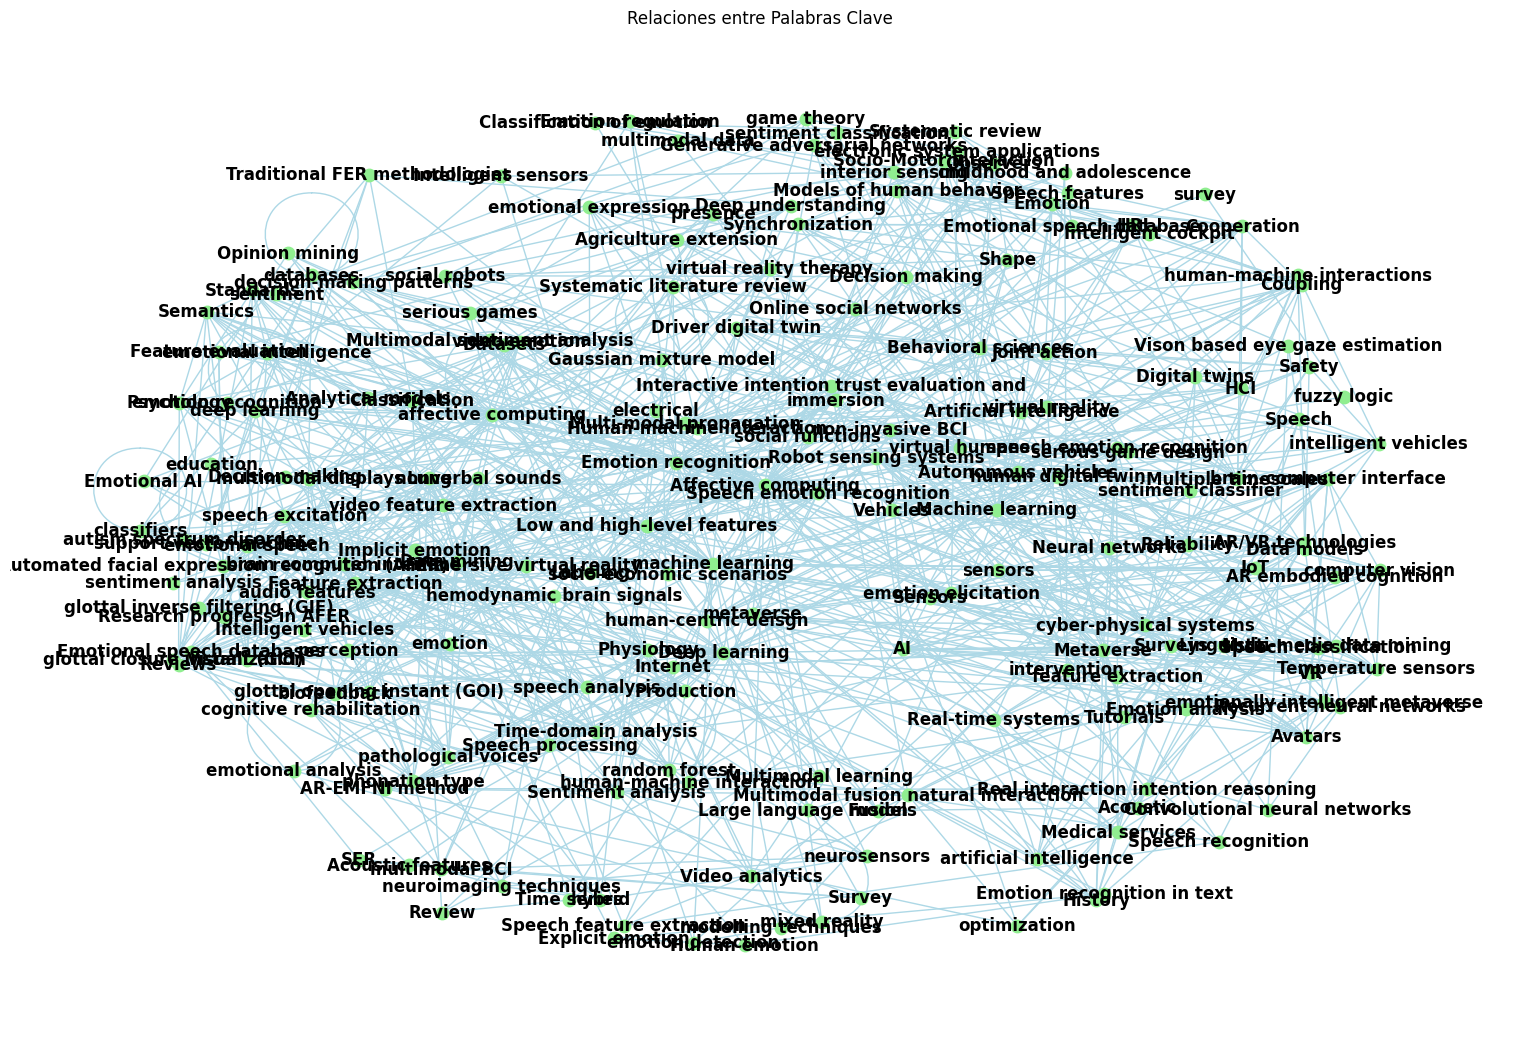

In [ ]:
import networkx as nx

G = nx.Graph()

# Añadir nodos y aristas al grafo basados en las relaciones entre palabras clave
for index, row in publicaciones_mas_citadas.iterrows():
    keywords = row['Author Keywords']
    if pd.notna(keywords):
        keywords_list = keywords.split('; ')
        for i, word in enumerate(keywords_list):
            for j in range(i+1, len(keywords_list)):
                G.add_edge(keywords_list[i], keywords_list[j])

# Dibujar el grafo
plt.figure(figsize=(15,10))
pos = nx.spring_layout(G, k=1)
nx.draw(G, pos, with_labels=True, node_size=80, font_size=12, node_color="lightgreen", font_color="black", font_weight='bold', edge_color="lightblue")
plt.title('Relaciones entre Palabras Clave')